<a href="https://colab.research.google.com/github/netanoir/material-of-language/blob/master/black_feminist_aitextgen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Provocations towards speculative Black feminist autotheory (GPT-2 version)
Code originally by [Max Woolf](https://minimaxir.com), which uses aitextgen to train a GPT-2 text-generating model with GPU

Adapted from Allison Parrish's copy of the notebook, which incorporates [this fix](https://github.com/minimaxir/aitextgen/issues/58))

Additional changes to code and content made by [neta bomani](https://netabomani.com).

This is a computer generated play. The play is concerned with gesturing towards a speculative anthology of generative Black feminist autotheory. I read a lot of Black feminist literature, especially for [my thesis](../m4sp.html). In reading all the scholars, theorists, non fiction writers, fiction writers, poets, philosphers and thinkers, I like to imagine all of them getting together and talking about the very things they write about. 

When it comes to Black feminist literature, I'm especially drawn to the autotheoretical elements that often inform the work. For example, Saidiya Hartman's _Wayward Lives, Beautiful Experiments: Intimate Histories of Riotous Black Girls, Troublesome Women and Queer Radicals_, Hortense Spiller's _Mama's Baby, Papa's Maybe: An American Grammar Book_, and Toni Morrison's _The Bluest Eye_. **Autotheory** is a framework which foregrounds subjective and autobiographical material as the basis for generating theory. While autotheory is deeply informed by autobiography, autotheory is not synomymous with or irreducible to autobiography. 

I'm inspired by the work of Black feminist playwrights Anna Deavere Smith (_Fires in the Mirror: Crown Heights, Brooklyn and Other Identities_) and Nikki Yeboah (_The (M)others_). Both playwrights blend oral history and peformance in a way that blurs the distinction between the two. [Oral history](https://en.wikipedia.org/wiki/Oral_history) can serve as research to support autotheories. 

For this project, I'm interested in how I can collaborate with computers, more specifically the Python programming language, [spaCy](https://spacy.io/) natural language processing tool and [Tracery](https://tracery.io/) grammar to write Black feminist [autofiction](https://en.wikipedia.org/wiki/Autofiction) where the real life identities of the cast of characters is preserved in the way that they're named, but fictionalized by the content of what the characters say, think or do in hopes of speculating a dialectic that could potentially create a kind of computational autotheory.

The corpora I used to generate the play consists of the following full-text works, with the exceptions of the interviews in which the interviewers words were removed:

__Alice Walker__ 
- ["I feel dedicated to the whole of humanity," Alice Walker interviewed by _the Guardian_](https://www.theguardian.com/books/2013/mar/09/alice-walker-beauty-in-truth-interview)
- _The Color Purple_ 

__Denise Ferreira da Silva__ 
- ["In the Raw"](https://www.e-flux.com/journal/93/215795/in-the-raw/)
- ["1 (life) ÷ 0 (blackness) = ∞ − ∞ or ∞ / ∞: On Matter Beyond the Equation of Value"](https://www.e-flux.com/journal/79/94686/1-life-0-blackness-or-on-matter-beyond-the-equation-of-value/)

__Hortense Spillers__ 
- "Mama's Baby, Papa's Maybe: An American Grammar Book"
- Critical Theory in a Time of Crisis

__June Jordan__ 
- Letter to the Local Police
- 1977: Poem for Mrs. Fannie Lou Hamer 
- Poem about My Rights
- A poem about intelligence for my brothers and sisters
- On the Loss of Energy (and Other Things)

__Octavia Butler__ 
- [Octavia Butler interviewed by Joshunda Sanders](https://medium.com/@joshunda/an-interview-with-octavia-butler-2004-8933300df98a)
- _Dawn_
- "Speech Sounds"

__Saidiya Hartman__ 
- "The Plot of Her Undoing"
- "Venus in Two Acts" 

__Toni Morrison__ 
- ["I Regret Everything" Toni Morrison interviewed by NPR](https://www.npr.org/2015/08/24/434132724/i-regret-everything-toni-morrison-looks-back-on-her-personal-life)
- _Sula_

I'm in the process of fine-tuning this project with a [GPT-2](https://en.wikipedia.org/wiki/OpenAI#GPT-2) text-generating machine learning model which will be trained on the same corpora.


# Install dependencies

In [ ]:
!pip install markovify
!pip install tracery
!pip install spacy==2.3.2
!python -m spacy download en_core_web_sm

!pip install -q aitextgen

import logging
logging.basicConfig(
        format="%(asctime)s — %(levelname)s — %(name)s — %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO
    )

from aitextgen import aitextgen
from aitextgen.colab import mount_gdrive, copy_file_from_gdrive

# Mount gdrive
Mount google drive so I can access the corpus text file within the notebook.

In [30]:
mount_gdrive()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
 file_name = "black-feminist-autotheory-training.txt"

In [32]:
copy_file_from_gdrive(file_name)

## Load the corpora

In [33]:
sentences = []
for line in open(file_name):
    # line = line.strip()
    line = line.strip("\n")
    items = line.split(".")
    sentences.append(items[0])

# Look inside the corpus
Let's attempt to look at all the sentences inside the text file using basic python. Then let's pick a random sentence. This won't be totally conclusive since I'm identifying sentences based off of periods, while many sentences within the corpus end with "?" and "!" and other punctuation.

In [34]:
import random

In [35]:
# print all the sentences and how many there are
print(sentences)
len(sentences)

['\ufeff[ALICE WALKER]', '[I FEEL EVERYTHING]', "I'm still living at least five parallel lives, honestly! I wonder about it", '', '', 'I think many people in my community had very different kinds of mothers: they had mothers who acquiesced in the system of male and white-supremacist domination and my mother never did', '', '', 'I wanted to have a room of my own', '', '', 'In each of us, there is a little voice that knows exactly which way to go', '', '', "I have, because I've wanted them to be seen in their radiance, in their humanity and their struggles and toils, which are so like everybody else's", '', '', 'When I was 13, my sister was a cosmetologist – she made up the bodies in the funeral home', '', '', 'It had a big impact on me', '', '', "I love the women's movement and I never thought of it as belonging to any particular segment of the population", '', '', '', '', 'The conundrum, in a way, is why, after all the struggle, and all the teaching – teaching was so important: we taug

25322

In [36]:
random.choice(sentences)

'downstairs, ain’t they? And I bake every Saturday,'

## Natural language processing

Let's separate the corpus with spacy, which will help with natural language processing which includes identifying sentences (more comprehensively for different types of puncutation, parts of speech and entities, for example. Spacy isn't perfect, but it'll do.

In [37]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [38]:
# open & format the corpus for analysis
nlp.max_length = 100000000
corpus = open(file_name).read()
document = nlp(corpus)

In [49]:
# sentences
sentences = list(document.sents)
random.choice(sentences)

It refused to answer, remained silent for several minutes.

In [51]:
# parts of speech
# these are the parts of speech i'm interested in computationally writing with
nouns = []
adjectives = []
verbs = []
adverbs = []
proper_nouns = []
numbers = []
determiners = []
coordinating_conjunctions = []

for token in document:
  if token.pos_ == 'NOUN':
    nouns.append(token)
  if token.pos_ == 'ADJ':
    adjectives.append(token)
  if token.pos_ == 'VERB':
    verbs.append(token)
  if token.pos_ == 'PROPN':
    proper_nouns.append(token)
  if token.pos_ == 'ADV':
    adverbs.append(token)
  if token.pos_ == 'NUM':
    numbers.append(token)
  if token.pos_ == 'DET':
    determiners.append(token)
  if token.pos_ == 'CCONJ':
    coordinating_conjunctions.append(token)

In [53]:
# entities
# documentation: https://spacy.io/api/annotation#named-entities
people = []
locations = []
times = []

for token in document:
  if token.ent_type_ == 'PERSON':
    people.append(token)
  if token.ent_type_ == 'LOC':
    locations.append(token)
  if token.ent_type_ == 'TIME':
    times.append(token)

In [54]:
# show a random noun
random.choice(nouns)

# out of curiosity - how many nouns are there?
# len(nouns)

face

In [55]:
# show a random adjective
random.choice(adjectives)


dirty

In [57]:
# show a random proper noun
random.choice(proper_nouns)


Grady

In [58]:
# show all the adverbs
print(adverbs)

[still, honestly, how, very, never, just, just, when, exactly, very, early, even, so, back, exactly, So, so, else, really, almost, When, Now, actually, now, more, out, when, often, never, often, never, especially, really, even, there, why, so, basically, always, just, else, ago, So, even, then, rarely, publicly, when, yet, again, back, actually, actually, though, completely, deeply, absolutely, always, very, else, back, prior, resolutely, why, once, at, all, immediately, Perhaps, infrequently, perhaps, else, already, as, quite, then, always, everywhere, there, as, well, clearly, now, everywhere, better, never, always, Maybe, too, soon, Finally, by, again, already, half, never, Just, First, sort, of, around, Then, Then, When, better, never, now, now, too, last, long, fast, enough, back, there, else, When, then, then, Finally, Where, there, too, more, always, down, Why, home, round, so, almost, home, only, though, now, here, even, even, Maybe, Sometime, still, always, Now, why, never, ag

In [61]:
# show a random person
random.choice(people)

Shug

In [62]:
# show all the times
print(times)

[evening, all, night, that, evening, ten, 
, o'clock, the, evening, the, next, morning, all, night, all, night, all, night, three, hours, Nine, o'clock, last, night, morning, a, few, hours, late, one, night, a, few, minutes, the, night, the, night, this, evening, last, night, Last, night, this, morning, three, four, hours, night, ten, minutes, early, one, morning, the, last, minute, every, evening, the, night, night, the, evening, maybe, half, a, hour, night, every, night, morning, One, night, night, Maybe, half, a, minute, half, a, hour, the, minute, all, night, five, o'clock, fifteen, minutes, later, five, o'clock, fifteen, minutes, Christmas, morning, The, minute, all, night, one, night, One, night, morning, night, all, night, a, hour, One, night, One, minute, The, next, minute, the, morning, a, 
, morning, afternoon, our, second, evening, just, last, night, around, four, o'clock, five, o'clock, eleven, o'clock, four, o'clock, night, this, morning, afternoon, the, night, the, evenin

In [63]:
# show a random location
# this isn't doing a great job of identifying locations - there are definitely more!
# random.choice(locations)

# show all the numbers
print(numbers)

[five, 400, 13, One, one, two, three, 30, 70, 50-something, eleven, fourteen, one, one, three, one, one, ten, thousand, one, two, twenty, one, One, one, twelve, one, four, three, two, two, six, eight, ten, two, six, five, five, thirty, two, one, seven, ole, one, one, Two, One, one, one, one, twenty, five, one, one, seventeen, fifteen, five, one, three, million, three, Nine, one, seven, eight, one, two, two, hundred, one, three, One, two, two, two, one, six, four, two, Five, Six, six, Two, two, one, One, Five, one, one, two, one, three, one, two, one, one, one, one, five, ten, three, two, six, three, four, two, one, five, two, ten, one, two, one, one, two, six, One, two, three, four, one, One, One, Five, two, three, one, two, One, two, One, one, five, five, six, Six, five, two, two, One, two, one, one, One, Six, twelve, one, one, two, five, eight, two, Twelve, two, ole, one, three, Two, One, two, fifteen, one, one, six, one, ten, 6, Three, one, two, six, one, one, three, one, one, two, 

### Build the play with Tracery grammars
Finally, the fun part - recombining all the sentences, parts of speech and entities into a play! 

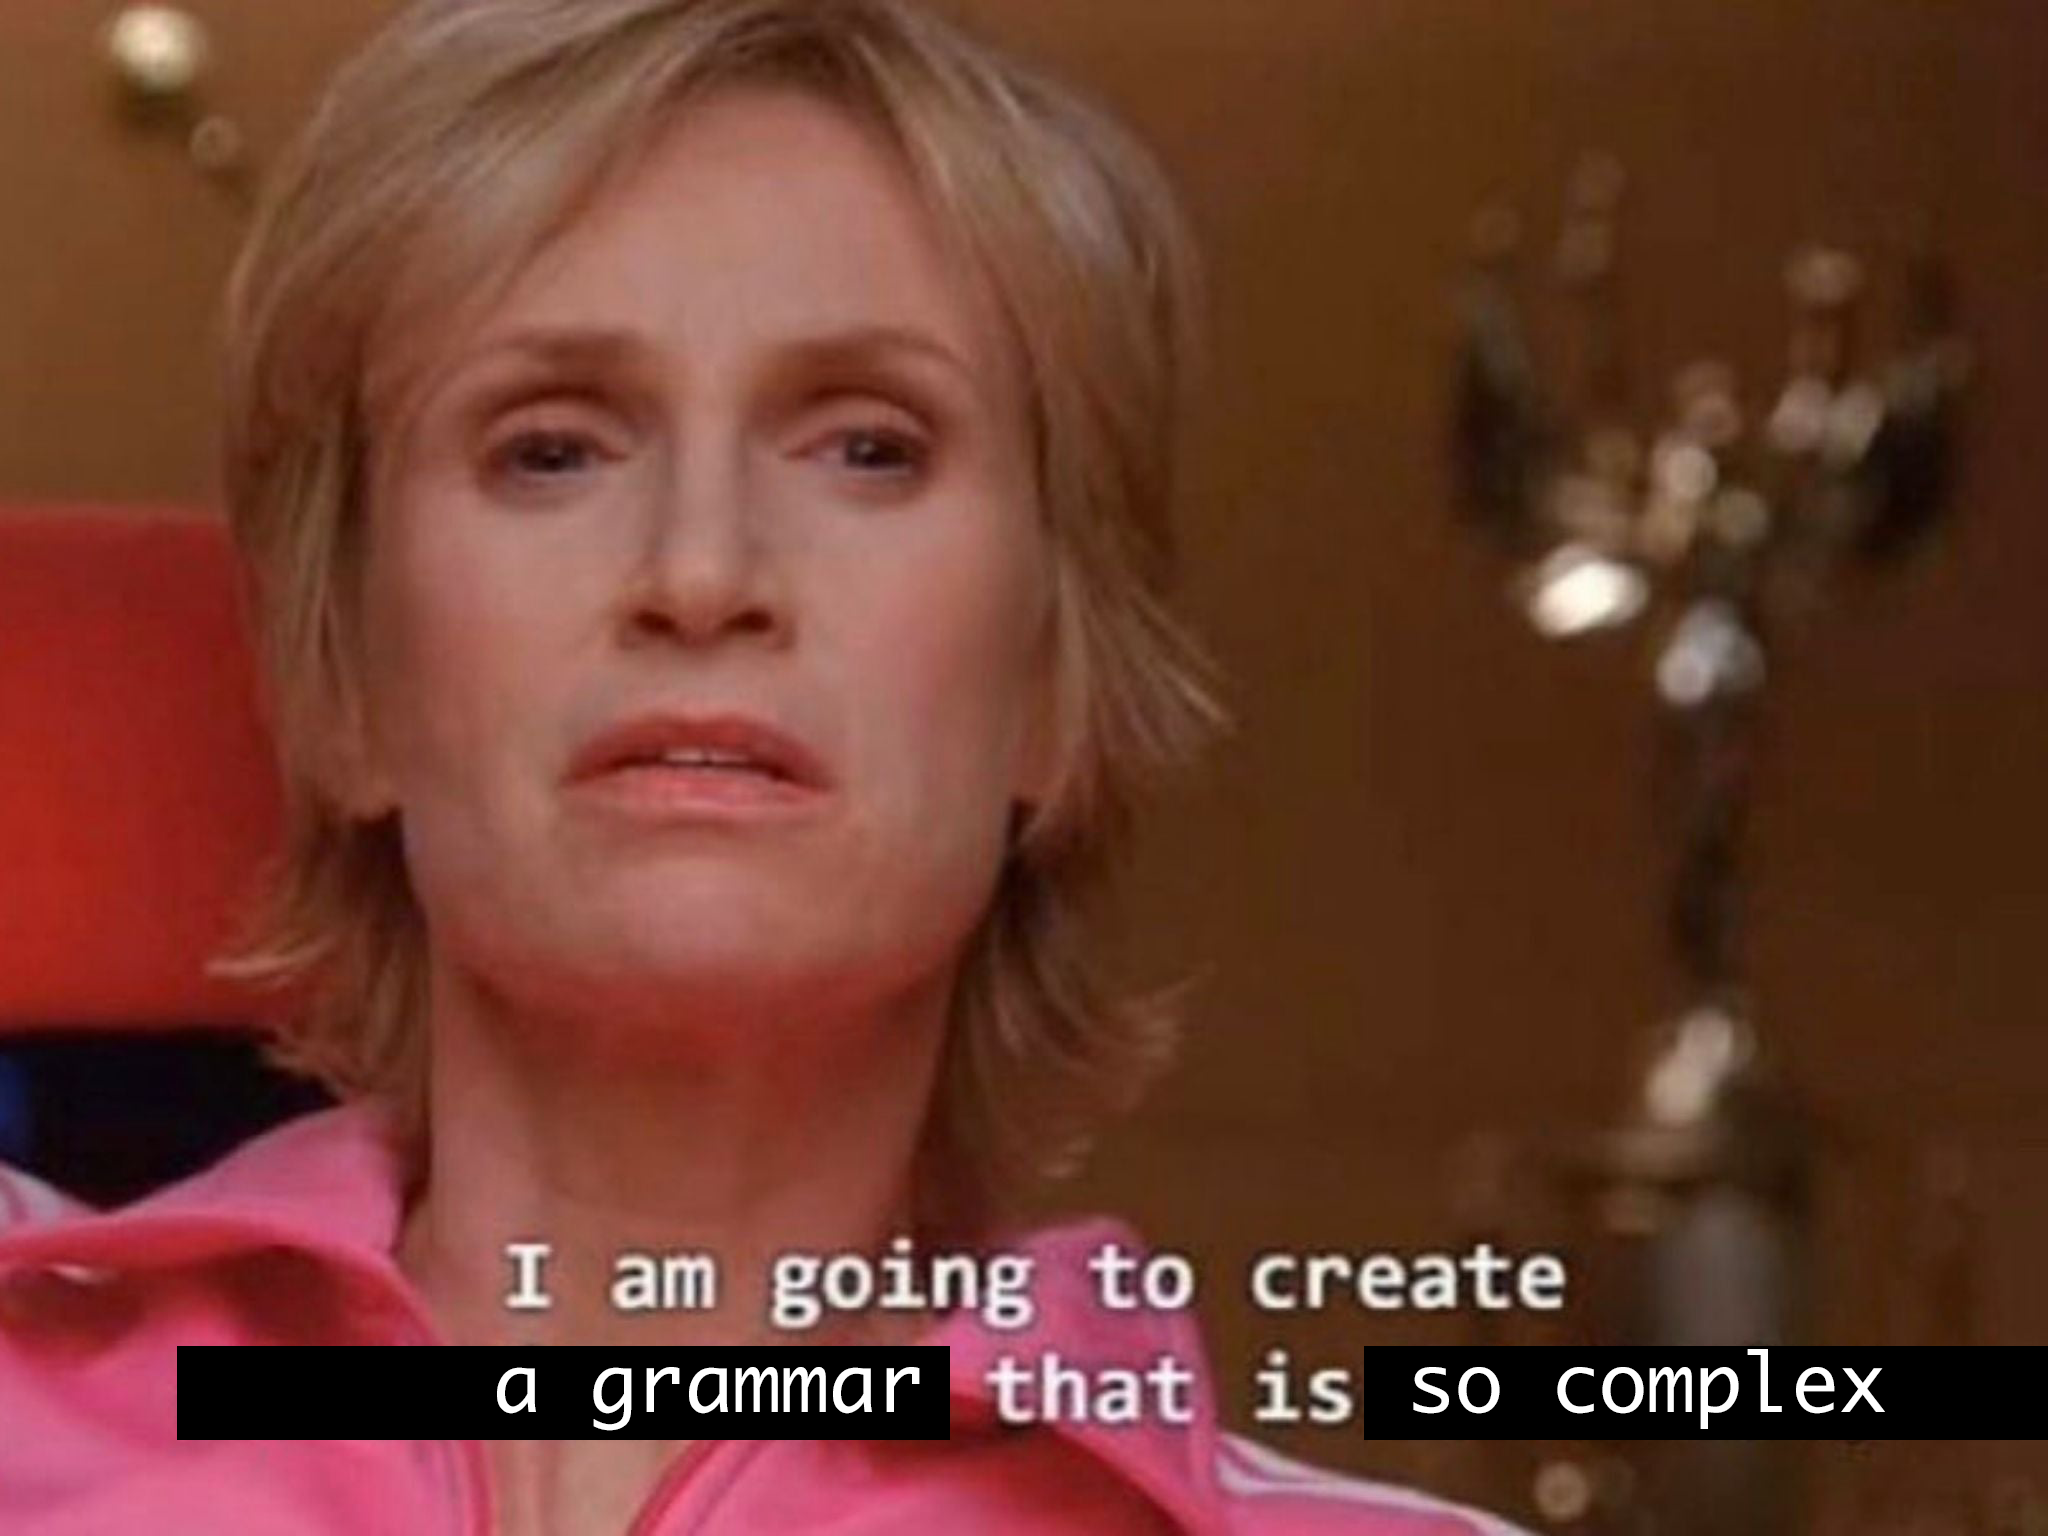
[I'm going to create a grammar that is so complex](https://imgur.com/a/TvAGfZC).

In [64]:
import tracery
from tracery.modifiers import base_english

In [65]:
rules = {
    "title": [
              "#determiner# #adjective# #noun#",
              "#determiner# #verb#",
              "#number.capitalize# #noun#",
              "#adjective# #determiner# #adjective#"
    ],
    "origin": "#question# #sentence# #sentence#",
    "question": [
               "#character-first#: What if #noun.lowercase# is #adverb.lowercase# an attempt at #verb-ing.lowercase# for #noun.lowercase#?",
               "#character-first#: What's in #noun#?",
               "#character-first#: What if it is that what we recognize as #noun# allows us to identify regularities and dependable fixes?",
               "#character-first#: What if the #comparative-adjective# #noun# and #comparative-adjective# #noun# turn out to be exactly the same thing?",
               "#character-first#: Can the shock of such words give rise to a certain affect of #noun# mixed with #noun#?",
               "#character-first#: What else is there to #verb#?",
               "#character-first#: What is the connection between #noun# and #noun#?"

    ],
    "setting": [
                "#city#. #season.capitalize#. #time.capitalize#. #character-first# stares out the window while #character-first# takes a sip of #beverage#. #character-first# clears her throat, almost on the verge of something. So this is the #venue#.",
                "The #venue# in #city#. #time.capitalize#, the weather is #adjective#, but #adverb# still #adjective#. #character-first# prepared #beverage# for everyone and served it on a tray. They can all feel the thoughts #verb-ing# in #character-first#'s mind.",
                " #time.capitalize#. #adverb.capitalize# #adjective# and #adjective#, #adjective# living room in a large flat belonging to #character-first# near #venue#. #character-first# is sitting in an armchair next to #character-first#. #character-first# is pacing while #character# puts an ancient record on. Everyone is #verb-ing# pretty #adjective#.",
                "#time.capitalize#. Only #adjective# light seems to be coming from the outside. The time machine seems to be malfunctioning, but #character-first# is confident she can fix it. #character-first# is talking a lot, which is to say that, she’s not talking enough. In the distance, there are children #verb-ing#."
                ],
    "sentence": [w.text for w in sentences],
    "response": [
                  "#character-first#: #sentence#",
                  "#character-first#: It’s not #noun# that comes first, it’s #noun#.",
                  "#character-first#: #character-first#—",
                  "#character-first#: The #noun# produces real affects, but we need to reserve ourselves the right to #verb# it.",
                  "#character-first#: #noun.capitalize# produces a certain kind of desire, a recovery of something you never had before. A desire for us is #noun#.",
                 "#character-first#: She didn't have to take it #adverb#, but #adverb# she did."
    ],
    "noun": [w.text for w in nouns],
    "verb": [w.text for w in verbs if w.text not in ('ing', 'ed', 'was', 'were', 'went')],
    "verb-ing": [w.text for w in verbs if ('ing') in w.text],
    "adverb": [w.text for w in adverbs if ('ly') in w.text], # only include degree adverbs
    "comparative-adjective": [w.text for w in adjectives if w.tag_ == 'JJR'],
    "adjective": [w.text for w in adjectives],
    "number": [w.text for w in numbers if w.tag_ == 'CD'],
    "determiner": [w.text for w in determiners],
    "coordinating-conjunction": [w.text for w in coordinating_conjunctions], #for compound sent
    "hero": [
                  "Alice",
                  "Denise",
                  "Hortense",
                  "June",
                  "Octavia",
                  "Saidiya",
                  "Toni"
    ],
    "character-first": [
                  "Alice",
                  "Denise",
                  "Hortense",
                  "June",
                  "Octavia",
                  "Saidiya",
                  "Toni"
    ],
    "character-full": [
                  "Alice Walker",
                  "Denise Ferreira da Silva",
                  "Hortense Spillers",
                  "June Jordan",
                  "Octavia Butler",
                  "Saidiya Hartman",
                  "Toni Morrison"
    ],
    "venue": [
              "Black Studies Department",
              "Afterlife",
              "Black Tower",
              "Clearing",
              "Impasse",
              "Landing",
              "Space Between",
              "Writers Workshop",
              "Zoom Room"
    ],
    "city": [
            "New York City, NY", 
            "Los Angeles, CA", 
            "Pasadena, CA", 
            "Oakland, CA", 
            "San Francisco, CA", 
            "Eatonton, GA", 
            "Lorain, OH", 
            "Joplin, MO", 
            "Saint Paul de Vence, FR", 
            "Detroit, MI", 
            "Benton Harbor, MI", 
            "Chicago, IL", 
            "Arusha, TZ", 
            "Zanzibar, TZ", 
            "Accra, GA"],
    "season": [
               "Winter", 
               "Spring", 
               "Summer", 
               "Fall"],
    "time": [
             "early afternoon", 
             "late morning", 
             "3:46 a.m", 
             "beyond time", 
             "the crack of dawn"
             ],
    "beverage": [
                 "coffee", 
                 "tea", 
                 "water", 
                 "hot chocolate", 
                 "kombucha",
                 "wine", 
                 "juice"
                 ]
}

In [66]:
grammar = tracery.Grammar(rules)
grammar.add_modifiers(base_english)

# Format play and display
Moment of truth

In [68]:
import textwrap

title = "Provocations towards speculative Black feminist autotheory"
authors = [
           "Neta Bomani", 
           "MacBook Air 2014", 
           "NVIDIA-SMI 455.38", 
           "Python 3.7"
           ]
cast_title = "CAST OF CHARACTERS"
characters = [
              "Alice Walker",
              "Denise Ferreira da Silva",
              "Hortense Spillers",
              "June Jordan",
              "Octavia Butler",
              "Saidiya Hartman",
              "Toni Morrison"
              ]
act = "Act"
act_number = 1

print(title)
print( "a play by" + " " + authors[0] + ", " + authors[1] + " and " + authors[3])
print()
print(cast_title)
for character in characters:
  print(character)
print()
print()

for i in range(4):
  print()
  print(act + " " + str(act_number + i) + ":" + " " + grammar.flatten("#title.capitalize#"))
  print()
  print( textwrap.fill( grammar.flatten("#setting#") ) )
  print()
  print()
  for i in range (10):
    print( textwrap.fill( grammar.flatten("#response#") ) )
    print()
    print( textwrap.fill( grammar.flatten("#origin#") ) )
    print()

Provocations towards speculative Black feminist autotheory
a play by Neta Bomani, MacBook Air 2014 and Python 3.7

CAST OF CHARACTERS
Alice Walker
Denise Ferreira da Silva
Hortense Spillers
June Jordan
Octavia Butler
Saidiya Hartman
Toni Morrison



Act 1: 33 love

 3:46 a.m. Keenly cold and cold, little living room in a large flat
belonging to June near Clearing. Hortense is sitting in an armchair
next to Saidiya. Octavia is pacing while ((character)) puts an ancient
record on. Everyone is doing pretty manifold.


Toni: Opposition produces a certain kind of desire, a recovery of
something you never had before. A desire for us is one.

Saidiya: What else is there to going? In the fifties, when I was a
student, the embarrassment of being called a politically minded writer
was so  None.

Alice: June—

Octavia: Can the shock of such words give rise to a certain affect of
words mixed with launder? The method guiding this writing practice is
best described as critical fabulation. I know the

In [ ]:
# install ML dependencies
!pip3 install pytorch-lightning==0.7.6
!pip3 install transformers==2.9.1
!pip3 install fire==0.3.0

## GPU
Tell our overlord google to start up a GPU computer.

Colaboratory uses a Nvidia P4, an Nvidia T4, or an Nvidia P100 GPU. For finetuning GPT-2 124M, any of these GPUs will be fine, but for text generation, a T4 or a P100 is ideal since they have more VRAM.

Verify which GPU is active by running the cell below.

In [ ]:
!nvidia-smi

## Load GPT-2

In [71]:
ai = aitextgen(tf_gpt2="124M", to_gpu=True)

12/03/2020 05:26:44 — INFO — aitextgen — Loading 124M GPT-2 model from /aitextgen.
12/03/2020 05:27:02 — INFO — aitextgen — Using the default GPT-2 Tokenizer.


## Finetune GPT-2

In [7]:
ai.train(file_name,
         line_by_line=False,
         from_cache=False,
         num_steps=5000,
         generate_every=1000,
         save_every=1000,
         save_gdrive=True,
         learning_rate=1e-4,
         batch_size=1, 
         )

12/03/2020 03:14:30 — INFO — aitextgen.TokenDataset — Encoding 25,322 sets of tokens from black-feminist-autotheory-training.txt.
/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: You have set progress_bar_refresh_rate < 20 on Google Colab. This may crash. Consider using progress_bar_refresh_rate >= 20 in Trainer.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
12/03/2020 03:14:31 — INFO — lightning — GPU available: True, used: True
TPU available: False, using: 0 TPU cores
12/03/2020 03:14:31 — INFO — lightning — TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
12/03/2020 03:14:31 — INFO — lightning — LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


1,000 steps reached: saving model to /trained_model
1,000 steps reached: generating sample texts.
 The Book of Jubilee.......”
“It is a mystery that I never knew....“
“The Book of Jubilee is a mystery,” I said. “It is the book of Jubilee that I’ve been meaning to describe for a while. It is a book about Jubilee, and it is incomplete.”
“This is a book about Jubilee,” she said. “It describes the life before the founding of the state. It tells the story of the founding of the state, but it does nothing about the founding of the executive order. It is a history of those who went before and does nothing about the founding of the state. It does, in fact, tell our history during the founding of our country.”







































2,000 steps reached: saving model to /trained_model
2,000 steps reached: generating sample texts.
.
Now it was time for her to go back to school. She had decided not to take part in the new life that she and Nikanj had begun. She had gone to Nikanj t

12/03/2020 03:50:42 — INFO — aitextgen — Saving trained model pytorch_model.bin to /trained_model



## Load the trained model

In [72]:
from_folder = "trained_model"

for file in ["pytorch_model.bin", "config.json"]:
  if from_folder:
    copy_file_from_gdrive(file, from_folder)
  else:
    copy_file_from_gdrive(file)

Load the retrained model + metadata necessary to generate text

In [73]:
ai = aitextgen(model="pytorch_model.bin", config="config.json", to_gpu=True)

12/03/2020 05:27:48 — INFO — aitextgen — Loading GPT-2 model from provided pytorch_model.bin.
12/03/2020 05:27:53 — INFO — aitextgen — Using the default GPT-2 Tokenizer.


## Generate Text From The Trained Model

Generate `generate()` text

In [74]:
ai.generate()



She went with him to the toilet, put out her cigarette, and hooked the cap on the back of the head
when she put out the cigarette.
He was pee-ing all over the place. Not all the time talking, but all the time
talking. It took her breath away.
She hated him, but she didn't hate him at all. He was spiteful, telling so little
about life and death, and the people he touched made her think of him as a
devil, a ticking bomb. It took her breath away.
“I thought you was dead,” he said when she told him she had been too
late. “You still got nightmares,” she said.
“You could have been a mayor or a soldier.”
“That’s what happened to you.”
“I thought not.”
“I wanted to. You wanted to live. You wanted to go to war.”
“You didn’t have a vote.”
“You can’t get away with saying how proud


In [76]:
ai.generate(n=5,
            batch_size=5,
            prompt="[SAIDIYA HARTMAN]\nSaidiya:",
            max_length=768,
            temperature=1.5,
            top_p=0.9)

[SAIDIYA HARTMAN]
Saidiya: I met Nikanj about ten years ago, it was the first time I'd heard a word in a male-female pair. I knew more about it than the male. Almost nothing about itai-ly. I expected it to be conversant with you, though. It opened your eyes when I actually looked at it. I felt enveloped, and grateful, though... I smiled, accepted the woman’s role and began learning from her. That felt right.”
I felt like I was on Earth with Nikanj, hearing its voice. “It... feels that way.”
I know that expression seem odd to you, but I’ve been Awake among the humans for so long. What do you expect from them?”
“It’s a different animal, you see. A totally different animal. That’s why we’ve handled this the way we have.” She looked at it, then at Kahguyaht. “Troublemakers,” she said, though in what she had called, "extreme cases."
“Do you believe he’s an alien?”
“I believe that he is.”
“If you’ve guessed that much, I would say it’s because I believed it.”
“That’s not true!”
“That’s the id

The code in the following cell generates one output, and then formats it nicely with Python's `textwrap` module:

In [83]:
# collect a corpus of new words for denise da silva
silva_corpus = ai.generate_one(
            # prompt="[IN THE RAW]\nDenise:",
            prompt="[DENISE FERREIRA DA SILVA] [IN THE RAW] [1 (life) ÷ 0 (blackness) = ∞ − ∞ or ∞ / ∞: On Matter Beyond the Equation of Value]",
            max_length=768,
            temperature=1.5,
            top_p=0.9)
for i, line in enumerate(silva_corpus.split("\n")):
    if i > 0 and "[DENISE FERREIRA DA SILVA]" in line:
        break
    print(textwrap.fill(line, 60))
    print()

[DENISE FERREIRA DA SILVA] [IN THE RAW] [1 (life) ÷ 0
(blackness) = ∞ − ∞ or ∞ / ∞: On Matter Beyond the Equation
of Value] (1) The blackness referred to in Equation of Value
does not occupy ∞ − ∞ − ∞ because it is undeterminable, it
has no form: it is ∞ minus itself (0), and its existence has
no result because it has no form: that which has form (0) is
undeterminable because it exists (as ∞) without form (0).
However, the existence of undeterminable things is ineffable
to determinacy—that is, as the formal (formal) thing—because
its existence presupposes that nothing in itself is
undeterminable, that it has no value because it has no form:
that which has no value because of its form is
undeterminable because it is always already in the service
of determination. One is struck by the analogy between
determinacy and efficient causation—that is, as a proof of
the (formal) universal that something exists which has value
because it has form (0).





When we reject determinacy as formal (fo

In [90]:
# open & format silva's corpus for analysis
silva_text = silva_corpus
silva_document = nlp(silva_text)

In [91]:
# silva's sentences
silva_sentences = list(silva_document.sents)
random.choice(silva_sentences)

The blackness referred to in Equation of Value

In [95]:
# silva's parts of speech
silva_nouns = []
silva_adjectives = []
silva_verbs = []
silva_adverbs = []
silva_proper_nouns = []
silva_numbers = []
silva_determiners = []
silva_coordinating_conjunctions = []

for token in document:
  if token.pos_ == 'NOUN':
    silva_nouns.append(token)
  if token.pos_ == 'ADJ':
    silva_adjectives.append(token)
  if token.pos_ == 'VERB':
    silva_verbs.append(token)
  if token.pos_ == 'PROPN':
    silva_proper_nouns.append(token)
  if token.pos_ == 'ADV':
    silva_adverbs.append(token)
  if token.pos_ == 'NUM':
    silva_numbers.append(token)
  if token.pos_ == 'DET':
    silva_determiners.append(token)
  if token.pos_ == 'CCONJ':
    silva_coordinating_conjunctions.append(token)

In [94]:
# hartman's entities
silva_people = []
silva_locations = []
silva_times = []

for token in document:
  if token.ent_type_ == 'PERSON':
    silva_people.append(token)
  if token.ent_type_ == 'LOC':
    silva_locations.append(token)
  if token.ent_type_ == 'TIME':
    silva_times.append(token)

In [84]:
# do the same for saidiya hartman
hartman_corpus = ai.generate_one(
            # prompt="[IN THE RAW]\nDenise:",
            prompt="[SAIDIYA HARTMAN] [THE PLOT OF HER UNDOING] [VENUS IN TWO ACTS]",
            max_length=768,
            temperature=1.5,
            top_p=0.9)
for i, line in enumerate(hartman_corpus.split("\n")):
    if i > 0 and "[SAIDIYA HARTMAN]" in line:
        break
    print(textwrap.fill(line, 60))
    print()

[SAIDIYA HARTMAN] [THE PLOT OF HER UNDOING] [VENUS IN TWO
ACTS]

Venus in Two Acts



Every writer has his or her own story to tell about Venus.
There are many, many less scenes of Venus' life in the first
two acts of the play, but I chose not to include any of them
in this writing. I have chosen instead to include them in
the relay of history that I hope to make, a kind of
remembrance without stories, which are always in crises. For
this reason, I have avoided writing altogether, focusing
instead on stories by black and female writers and narrating
stories that are both inspirational and avoid the kind of
repetition that cannot be permitted. The goal of this
writing is not to create a history of Venus, but rather to
make a history of stories written by those women and girls
whose stories have made the history of their work possible.





It has occurred to me before now, but only by stealth, that
history—not color or race or religion—desiccated the
characters who were to appear in the

In [85]:
# open & format hartman's corpus for analysis
hartman_text = hartman_corpus
hartman_document = nlp(hartman_text)

In [87]:
# hartman's sentences
hartman_sentences = list(hartman_document.sents)
random.choice(hartman_sentences)

At least it has no access to the text of history, which has been lost or severely censored.

In [88]:
# hartman's parts of speech
hartman_nouns = []
hartman_adjectives = []
hartman_verbs = []
hartman_adverbs = []
hartman_proper_nouns = []
hartman_numbers = []
hartman_determiners = []
hartman_coordinating_conjunctions = []

for token in document:
  if token.pos_ == 'NOUN':
    hartman_nouns.append(token)
  if token.pos_ == 'ADJ':
    hartman_adjectives.append(token)
  if token.pos_ == 'VERB':
    hartman_verbs.append(token)
  if token.pos_ == 'PROPN':
    hartman_proper_nouns.append(token)
  if token.pos_ == 'ADV':
    hartman_adverbs.append(token)
  if token.pos_ == 'NUM':
    hartman_numbers.append(token)
  if token.pos_ == 'DET':
    hartman_determiners.append(token)
  if token.pos_ == 'CCONJ':
    hartman_coordinating_conjunctions.append(token)

In [89]:
# hartman's entities
hartman_people = []
hartman_locations = []
hartman_times = []

for token in document:
  if token.ent_type_ == 'PERSON':
    hartman_people.append(token)
  if token.ent_type_ == 'LOC':
    hartman_locations.append(token)
  if token.ent_type_ == 'TIME':
    hartman_times.append(token)

In [97]:
new_rules = {
    "title": [
              "#determiner# #adjective# #noun#",
              "#determiner# #verb#",
              "#number.capitalize# #noun#",
              "#adjective# #determiner# #adjective#"
    ],
    "origin": "#question# #sentence# #sentence#",
    "question": [
               "#character-first#: What if #noun.lowercase# is #adverb.lowercase# an attempt at #verb-ing.lowercase# for #noun.lowercase#?",
               "#character-first#: What's in #noun#?",
               "#character-first#: What if it is that what we recognize as #noun# allows us to identify regularities and dependable fixes?",
               "#character-first#: What if the #comparative-adjective# #noun# and #comparative-adjective# #noun# turn out to be exactly the same thing?",
               "#character-first#: Can the shock of such words give rise to a certain affect of #noun# mixed with #noun#?",
               "#character-first#: What else is there to #verb#?",
               "#character-first#: What is the connection between #noun# and #noun#?"

    ],
    "setting": [
                "#city#. #season.capitalize#. #time.capitalize#. #hartman# stares out the window while #silva# takes a sip of #beverage#. #hartman# clears her throat, almost on the verge of something. So this is the #venue#.",
                "#time.capitalize#. Only #adjective# light seems to be coming from the outside. The time machine seems to be malfunctioning, but #silva# is confident she can fix it. #hartman# is talking a lot, which is to say that, she’s not talking enough. In the distance, there are children #verb-ing#."
                ],
    "hartman_sentence": [w.text for w in hartman_sentences],
    "silva_sentence": [w.text for w in silva_sentences],
    "sentence": [w.text for w in sentences],
    "hartman_response": [
                  "#hartman#: #hartman_sentence#",
    ],
    "silva_response": [
                  "#silva#: #silva_sentence#",
    ],
    "response": [
                  "#character-first#: #sentence#",
                  "#character-first#: It’s not #noun# that comes first, it’s #noun#.",
                  "#character-first#: #character-first#—",
                  "#character-first#: The #noun# produces real affects, but we need to reserve ourselves the right to #verb# it.",
                  "#character-first#: #noun.capitalize# produces a certain kind of desire, a recovery of something you never had before. A desire for us is #noun#.",
                 "#character-first#: She didn't have to take it #adverb#, but #adverb# she did."
    ],
    "hartman_noun": [w.text for w in hartman_nouns],
    "hartman_verb": [w.text for w in hartman_verbs if w.text not in ('ing', 'ed', 'was', 'were', 'went')],
    "hartman_verb-ing": [w.text for w in hartman_verbs if ('ing') in w.text],
    "hartman_adverb": [w.text for w in hartman_adverbs if ('ly') in w.text], # only include degree adverbs
    "hartman_comparative-adjective": [w.text for w in hartman_adjectives if w.tag_ == 'JJR'],
    "hartman_adjective": [w.text for w in hartman_adjectives],
    "hartman_number": [w.text for w in hartman_numbers if w.tag_ == 'CD'],
    "hartman_determiner": [w.text for w in hartman_determiners],
    "hartman_coordinating-conjunction": [w.text for w in hartman_coordinating_conjunctions], #for compound sent
    
    "silva_noun": [w.text for w in silva_nouns],
    "silva_verb": [w.text for w in silva_verbs if w.text not in ('ing', 'ed', 'was', 'were', 'went')],
    "silva_verb-ing": [w.text for w in silva_verbs if ('ing') in w.text],
    "silva_adverb": [w.text for w in silva_adverbs if ('ly') in w.text], # only include degree adverbs
    "silva_comparative-adjective": [w.text for w in silva_adjectives if w.tag_ == 'JJR'],
    "silva_adjective": [w.text for w in silva_adjectives],
    "silva_number": [w.text for w in silva_numbers if w.tag_ == 'CD'],
    "silva_determiner": [w.text for w in silva_determiners],
    "silva_coordinating-conjunction": [w.text for w in silva_coordinating_conjunctions], #for compound sent


    "noun": [w.text for w in nouns],
    "verb": [w.text for w in verbs if w.text not in ('ing', 'ed', 'was', 'were', 'went')],
    "verb-ing": [w.text for w in verbs if ('ing') in w.text],
    "adverb": [w.text for w in adverbs if ('ly') in w.text], # only include degree adverbs
    "comparative-adjective": [w.text for w in adjectives if w.tag_ == 'JJR'],
    "adjective": [w.text for w in adjectives],
    "number": [w.text for w in numbers if w.tag_ == 'CD'],
    "determiner": [w.text for w in determiners],
    "coordinating-conjunction": [w.text for w in coordinating_conjunctions], #for compound sent
    "hartman": ["Saidiya"],
    "silva": ["Denise"],
    "venue": [
              "Black Studies Department",
              "Afterlife",
              "Black Tower",
              "Clearing",
              "Impasse",
              "Landing",
              "Space Between",
              "Writers Workshop",
              "Zoom Room"
    ],
    "city": [
            "New York City, NY", 
            "Los Angeles, CA", 
            "Pasadena, CA", 
            "Oakland, CA", 
            "San Francisco, CA", 
            "Eatonton, GA", 
            "Lorain, OH", 
            "Joplin, MO", 
            "Saint Paul de Vence, FR", 
            "Detroit, MI", 
            "Benton Harbor, MI", 
            "Chicago, IL", 
            "Arusha, TZ", 
            "Zanzibar, TZ", 
            "Accra, GA"],
    "season": [
               "Winter", 
               "Spring", 
               "Summer", 
               "Fall"],
    "time": [
             "early afternoon", 
             "late morning", 
             "3:46 a.m", 
             "beyond time", 
             "the crack of dawn"
             ],
    "beverage": [
                 "coffee", 
                 "tea", 
                 "water", 
                 "hot chocolate", 
                 "kombucha",
                 "wine", 
                 "juice"
                 ]
}

In [98]:
grammar = tracery.Grammar(new_rules)
grammar.add_modifiers(base_english)

# Format play and display
Another moment of truth

In [108]:
import textwrap

title = "A CONVERSATION BETWEEN SAIDIYA AND DENISE"
authors = [
           "Neta Bomani", 
           "MacBook Air 2014", 
           "NVIDIA-SMI 455.38", 
           "Python 3.7"
           ]
cast_title = "CAST OF CHARACTERS"
characters = [
              "Denise Ferreira da Silva",
              "Saidiya Hartman"
              ]
act = "Act"
act_number = 1

print(title)
print( "a play by" + " " + authors[0] + ", " + authors[1] + ", " + authors[2] + " and " + authors[3])
print()
print(cast_title)
for character in characters:
  print(character)
print()
print()

for i in range(1):
  print()
  print(act + " " + str(act_number + i) + ":" + " " + grammar.flatten("#title.capitalize#"))
  print()
  print( textwrap.fill( grammar.flatten("#setting#") ) )
  print()
  print()
  for i in range (10):
    print( textwrap.fill( grammar.flatten("#hartman_response#") ) )
    print()
    print( textwrap.fill( grammar.flatten("#silva_response#") ) )
    print()

A CONVERSATION BETWEEN SAIDIYA AND DENISE
a play by Neta Bomani, MacBook Air 2014, NVIDIA-SMI 455.38 and Python 3.7

CAST OF CHARACTERS
Denise Ferreira da Silva
Saidiya Hartman



Act 1: Silent The much

Oakland, CA. Summer. 3:46 a.m. Saidiya stares out the window while
Denise takes a sip of water. Saidiya clears her throat, almost on the
verge of something. So this is the Afterlife.


Saidiya: What I did not invent, however, is a story of Venus in which
she is simply put on display as a human face, but instead as an object
of desire, which signals a feeling of power, which is stronger than
the experience of the subject, but which, because it is already there,
has value.

Denise: That sentence alone refigures the picture of the world in
which the form of the object (being or of nature) is determined,
because it is (formal) not by determinants (laws or rules) but by
efficient causes (events, causes).

Saidiya:   Venus in Two Acts

Denise: ∞ or ∞

Saidiya: For this reason, I have chosen 